# Needle in the Haystack Data Generation

This python notebook generates data that shows DeepMapper can find small perturbations in noise.


## NIHS Data generation 

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
import torch
import torchvision
import random
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
import seaborn as sns

In [4]:
import plotly.express as px

In [5]:
seed=12345
random.seed(seed)


Generate multiple classes of random data with  N variables having small variations, not enough to be detected among widely changing random parameters.
Each variable for each class should supply a range as in the following example:

differentiators={'Class 1':{20:[0.0,0.2], 17689:[0.1,0.2]},
                 'Class 2':{20:[0.25,0.4], 17689:[0.25,0.35]}}
                 
In this example we are creating 2 classes with only differentiators are variable 20 and variable 17689 that are randomly generated in their given class ranges. All other variablesare generated with a uniform random distribution between 0 and 1

In [6]:
differentiators={'Class 1':{20:[0.0,0.2], 17689:[0.1,0.2]},
                 'Class 2':{20:[0.25,0.4], 17689:[0.25,0.35]}}

In [ ]:
def generate_data(num_instances,num_parameters,differentiators):
    label_names={}
    var_names=['var_'+str(i) for i in range(0,num_parameters)]
    for ndx,clskey in enumerate(differentiators.keys()):
        matrix=np.random.rand(num_instances,num_parameters)
        for varkey, varlist in differentiators[clskey].items():
            matrix[:,varkey]=np.random.uniform(low=varlist[0], high=varlist[1], size=(num_instances))
        if ndx==0:
            grand_matrix=matrix
            labels=np.zeros(num_instances)
    
        else:
            grand_matrix=np.append(grand_matrix,matrix,axis=0)
            labels=np.append(labels,np.full([num_instances],ndx),axis=0)
        label_names[clskey]=ndx
    instance_labels=np.array(range(0,grand_matrix.shape[1]))
    return(grand_matrix,labels,var_names, label_names)

In [7]:
X,y,data_labels, label_names=generate_data(7500,18225,differentiators)

In [9]:


def generate_data_1bit(num_instances, num_parameters,diff):
    b1=np.random.rand(num_instances,num_parameters)
    b1[:,20]=np.random.uniform(low=0.2, high=0.4, size=(num_instances))
    b1[:,17689]=np.random.uniform(low=0.3, high=0.5, size=(num_instances))
    b2=np.random.rand(num_instances,num_parameters)
    b2[:,20]=np.random.uniform(low=0.45, high=0.6, size=(num_instances))
    b2[:,17689]=np.random.uniform(low=0.6, high=0.7, size=(num_instances))
    return(np.append(b1,b2,axis=0))
X=generate_data_1bit(7500,18225,differentiators)

In [10]:
np.unique(y, return_counts=True)

(array([0., 1.]), array([7500, 7500]))

3.3125018283897134e-09 0.9999999997876708


(array([203., 185., 165., 186., 219., 219., 181., 179., 200., 186., 171.,
        186., 174., 179., 192., 195., 186., 184., 185., 169., 200., 218.,
        195., 196., 212., 173., 190., 181., 158., 194., 191., 178., 189.,
        150., 176., 198., 172., 209., 194., 182.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 201., 181., 198., 182., 179., 182.,
        194., 172., 210., 201., 188., 166., 192., 202., 187., 165., 166.,
        186., 200., 189., 153., 201., 186., 199., 200., 191., 196., 192.,
        178., 202., 190., 181., 176., 188., 171., 200., 175., 197., 200.,
        183.]),
 array([0.10002031, 0.10251985, 0.10501938, 0.10751891, 0.11001845,
        0.11251798, 0.11501751, 0.11751705, 0.12001658, 0.12251611,
        0.12501565, 0.12751518, 0.13001471, 0.13251425, 0.13501378,
        0.13751331, 0.14001285, 0.14251238, 0.14501191, 0.14751145,
        0.15001098, 0.15251051, 0.15501005, 0.

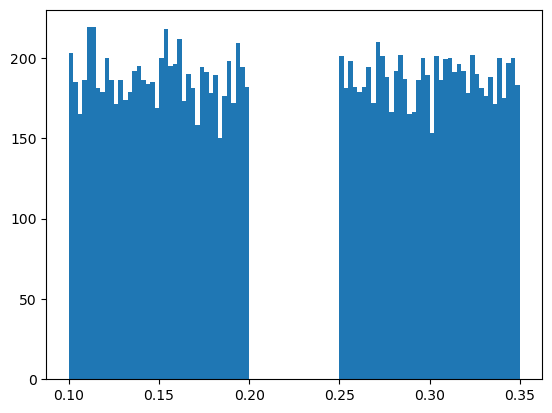

In [11]:
print (X.min(), X.max())

plt.hist(X[:,17689],  bins=100)

(array([123., 174., 148., 179., 144., 143., 140., 134., 158., 162., 162.,
        167., 142., 157., 139., 169., 151., 173., 143., 134., 155., 160.,
        150., 143., 148., 149., 158., 167., 136., 163., 131., 139., 147.,
        152., 178., 142., 138., 147., 173., 144., 149., 168., 159., 177.,
        126., 131., 150., 132., 158., 152., 127., 155., 143., 140., 143.,
        173., 165., 122., 146., 167., 161., 142., 143., 134., 119., 153.,
        168., 155., 145., 164., 132., 143., 159., 144., 153., 144., 164.,
        147., 163., 137., 159., 149., 161., 138., 144., 152., 155., 154.,
        156., 125., 151., 155., 155., 139., 132., 130., 155., 170., 153.,
        152.]),
 array([3.66697130e-05, 1.00362883e-02, 2.00359068e-02, 3.00355253e-02,
        4.00351439e-02, 5.00347624e-02, 6.00343810e-02, 7.00339995e-02,
        8.00336180e-02, 9.00332366e-02, 1.00032855e-01, 1.10032474e-01,
        1.20032092e-01, 1.30031711e-01, 1.40031329e-01, 1.50030948e-01,
        1.60030566e-01, 1.7003

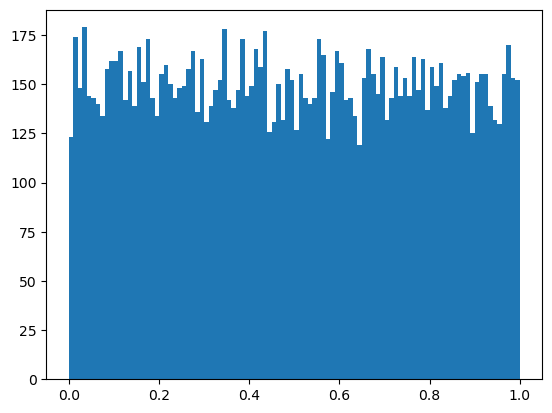

In [12]:
plt.hist(X[:,17691],  bins=100)

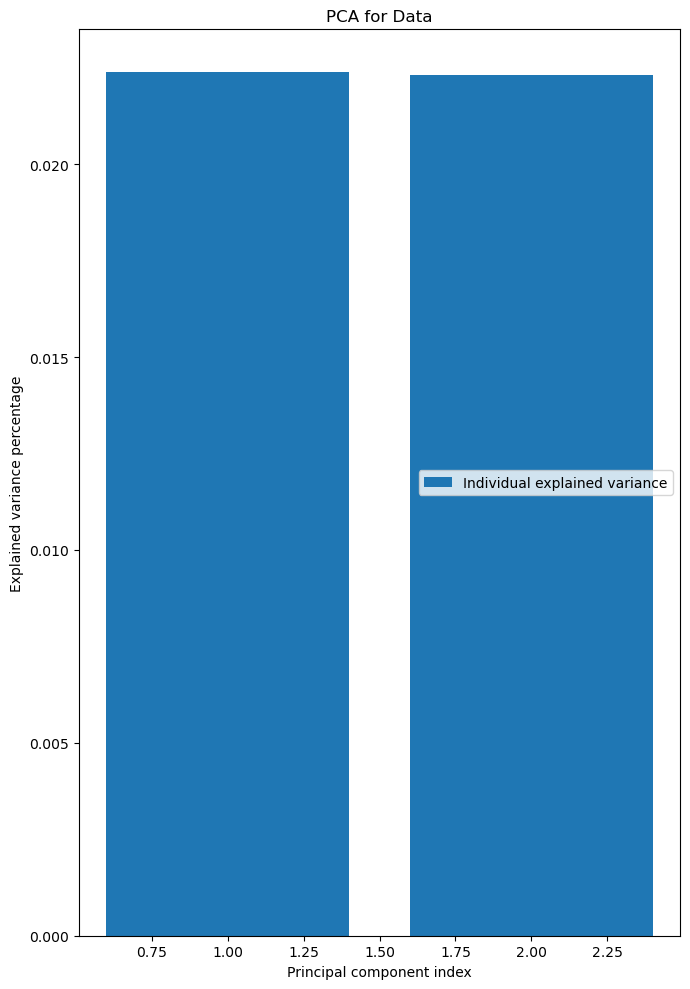

In [13]:
import numpy as np
from sklearn.decomposition import PCA
components=2
pca_r = PCA(n_components=components)
pca_X=pca_r.fit_transform(X)

exp_var = pca_r.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.figure(figsize=[7, 10])

plt.bar(range(1, components+1), exp_var, align='center',
        label='Individual explained variance')

#plt.step(range(1, components+1 cum_exp_var, where='mid',
#         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.legend(loc='right')
plt.title("PCA for Data")
plt.tight_layout()

In [14]:
distance_metric = 'cosine'
reducer = TSNE(
    n_components=2,
    metric=distance_metric,
    init='random',
    learning_rate='auto',
    n_jobs=-1
)

In [15]:
import umap.umap_ as umap
reducer_umap = umap.UMAP(
    n_components=2,
    #min_dist=0.8,
    metric=distance_metric,
    n_jobs=-1
)

2024-02-24 14:51:41.984531: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:7704] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 14:51:41.984568: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 14:51:41.984582: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1520] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-24 14:51:41.992260: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-24 14:51:42.700468: W tensorflow/c

In [16]:
tsne_X=reducer.fit_transform(X)

In [17]:
umap_X=reducer_umap.fit_transform(X)

In [18]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()

pca = PCA(n_components=2)
components = pca.fit_transform(X)

In [19]:

lbls=[str(i) for i in range(0,len(X))]
lbls= ['' if (abs(components[i][0])< 2) and (abs(components[i][1])< 2) else lbls[i] for  i in range(0,len(X))]
fig = px.scatter(components, x=0, y=1, color=y, text=lbls)
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

In [20]:
components = tsne_X
lbls=[str(i) for i in range(0,len(X))]
lbls= ['' if (abs(components[i][0])< 6) and (abs(components[i][1])< 2) else lbls[i] for  i in range(0,len(X))]

fig = px.scatter(components, x=0, y=1, color=y)
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

In [21]:
components = umap_X

fig = px.scatter(components, x=0, y=1, color=y)
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

In [22]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
y_enc = le.transform(y)
num_classes = np.unique(y_enc).size

In [23]:
obs_labels=['Obs_'+str(i) for i in range(0,len(X))]

In [56]:
import pickle
data={'X': X, 'y':y_enc, 'feature_names':data_labels, 'obs_names': obs_labels,'class_names':list(label_names.keys()) }
with open('pocdata-fin.pickle', 'wb') as data_file:
  pickle.dump(data, data_file)

Read this data from DeepMapper notebook to analyse the data with DeepMapper as follows:

import pickle
with open('pocdata-fin.pickle', 'rb') as data_file:

    data = pickle.load(data_file)
    
    X=data['X']
    
    y=data['y'] 
    
    feature_names=data['feature_names']
    
    obs_names=data['obs_names']
    
    class_names=data['class_names']
    